In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb


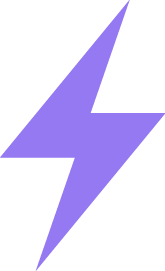

Running local mode, some functionality limited.



In [2]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [3]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

In [4]:
pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2.csv')
latlong = pd.read_csv('simplemaps-worldcities-basic.csv')

In [5]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [6]:
latlong.head()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan


In [7]:
pop = pop[['Country Code','2016']]
df = pd.merge(pop, latlong, left_on='Country Code', right_on='iso3')

In [8]:
df.head()

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,ABW,104822.0,Oranjestad,Oranjestad,12.530384,-70.028992,50887.5,Aruba,AW,ABW,NaN
1,AFG,34656032.0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
2,AFG,34656032.0,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
3,AFG,34656032.0,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
4,AFG,34656032.0,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz


df.to_csv('world.csv')

In [9]:
index = df['city'] + ', ' + df['country']
df

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,ABW,104822.0,Oranjestad,Oranjestad,12.530384,-70.028992,50887.5,Aruba,AW,ABW,NaN
1,AFG,34656032.0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
2,AFG,34656032.0,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
3,AFG,34656032.0,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
4,AFG,34656032.0,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
5,AFG,34656032.0,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan
6,AFG,34656032.0,Zareh Sharan,Zareh Sharan,32.850000,68.416705,13737.0,Afghanistan,AF,AFG,Paktika
7,AFG,34656032.0,Asadabad,Asadabad,34.866000,71.150005,48400.0,Afghanistan,AF,AFG,Kunar
8,AFG,34656032.0,Taloqan,Taloqan,36.729999,69.540004,64256.0,Afghanistan,AF,AFG,Takhar
9,AFG,34656032.0,Mahmud-E Eraqi,Mahmud-E Eraqi,35.016696,69.333301,7407.0,Afghanistan,AF,AFG,Kapisa


In [10]:
index.head()

0             Oranjestad, Aruba
1    Qal eh-ye Now, Afghanistan
2      Chaghcharan, Afghanistan
3      Lashkar Gah, Afghanistan
4           Zaranj, Afghanistan
dtype: object

In [11]:
df.index = index
df

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
"Oranjestad, Aruba",ABW,104822.0,Oranjestad,Oranjestad,12.530384,-70.028992,50887.5,Aruba,AW,ABW,NaN
"Qal eh-ye Now, Afghanistan",AFG,34656032.0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
"Chaghcharan, Afghanistan",AFG,34656032.0,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
"Lashkar Gah, Afghanistan",AFG,34656032.0,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
"Zaranj, Afghanistan",AFG,34656032.0,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
"Tarin Kowt, Afghanistan",AFG,34656032.0,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan
"Zareh Sharan, Afghanistan",AFG,34656032.0,Zareh Sharan,Zareh Sharan,32.850000,68.416705,13737.0,Afghanistan,AF,AFG,Paktika
"Asadabad, Afghanistan",AFG,34656032.0,Asadabad,Asadabad,34.866000,71.150005,48400.0,Afghanistan,AF,AFG,Kunar
"Taloqan, Afghanistan",AFG,34656032.0,Taloqan,Taloqan,36.729999,69.540004,64256.0,Afghanistan,AF,AFG,Takhar
"Mahmud-E Eraqi, Afghanistan",AFG,34656032.0,Mahmud-E Eraqi,Mahmud-E Eraqi,35.016696,69.333301,7407.0,Afghanistan,AF,AFG,Kapisa


In [12]:
usa = df[df['iso2'] == 'US']
X = usa[['lng','lat']]
y = usa['lat']
x = usa['lng']
labels = usa['city']
usa.sort_values('pop', ascending = False)

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
"New York, United States of America",USA,323127513.0,New York,New York,40.749979,-73.980017,13524139.0,United States of America,US,USA,New York
"Los Angeles, United States of America",USA,323127513.0,Los Angeles,Los Angeles,33.989978,-118.179980,8097410.0,United States of America,US,USA,California
"Chicago, United States of America",USA,323127513.0,Chicago,Chicago,41.829991,-87.750055,5915976.0,United States of America,US,USA,Illinois
"Houston, United States of America",USA,323127513.0,Houston,Houston,29.819974,-95.339979,4053287.0,United States of America,US,USA,Texas
"Philadelphia, United States of America",USA,323127513.0,Philadelphia,Philadelphia,39.999973,-75.169996,3504775.0,United States of America,US,USA,Pennsylvania
"Dallas, United States of America",USA,323127513.0,Dallas,Dallas,32.820024,-96.840017,3004852.0,United States of America,US,USA,Texas
"Miami, United States of America",USA,323127513.0,Miami,Miami,25.787611,-80.224106,2983947.0,United States of America,US,USA,Florida
"Boston, United States of America",USA,323127513.0,Boston,Boston,42.329960,-71.070014,2528070.5,United States of America,US,USA,Massachusetts
"Detroit, United States of America",USA,323127513.0,Detroit,Detroit,42.329960,-83.080056,2526135.0,United States of America,US,USA,Michigan
"Atlanta, United States of America",USA,323127513.0,Atlanta,Atlanta,33.830014,-84.399949,2464454.0,United States of America,US,USA,Georgia


In [13]:
lgn.scatter(x, y, labels = usa['city'])

Silhouette Coefficient: 0.112
Estimated number of clusters: 16
Homogeneity: 0.100
Completeness: 1.000
V-measure: 0.181
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tru

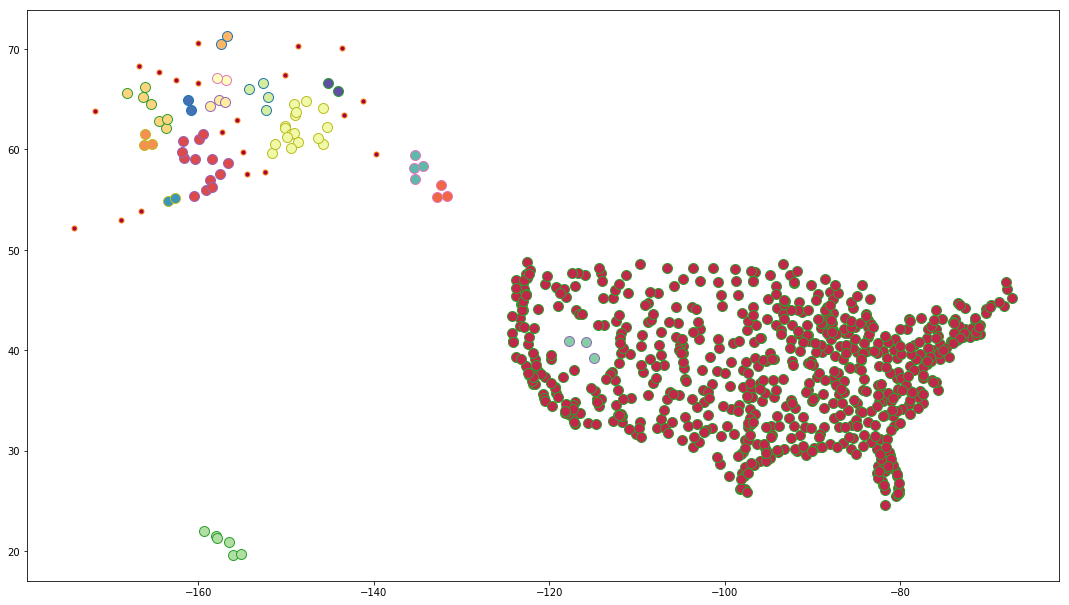

In [14]:
dbscanner(x, y, 2, 2)

# Million

In [15]:
million = df[df['pop'] > 1000000]

In [16]:
X = million[['lng','lat']]
x = million['lng']
y = million['lat']

In [17]:
lgn.scatter(x, y, labels = million['city'])

Silhouette Coefficient: 0.010
Estimated number of clusters: 61
Homogeneity: 0.501
Completeness: 0.993
V-measure: 0.666
[False False False False False False  True False False False False False
 False False  True  True  True False False False False False  True False
  True  True False False  True False False False False  True  True False
  True False False  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True  True False  True
 False  True False  True  True  True  True  True  True False  True  True
  True  True False  True  True  True  True  True False  True  True  True
 False  True  True False False  True  True False False False False False
 False  True  True  True False False False False  True  True False False
 Fals

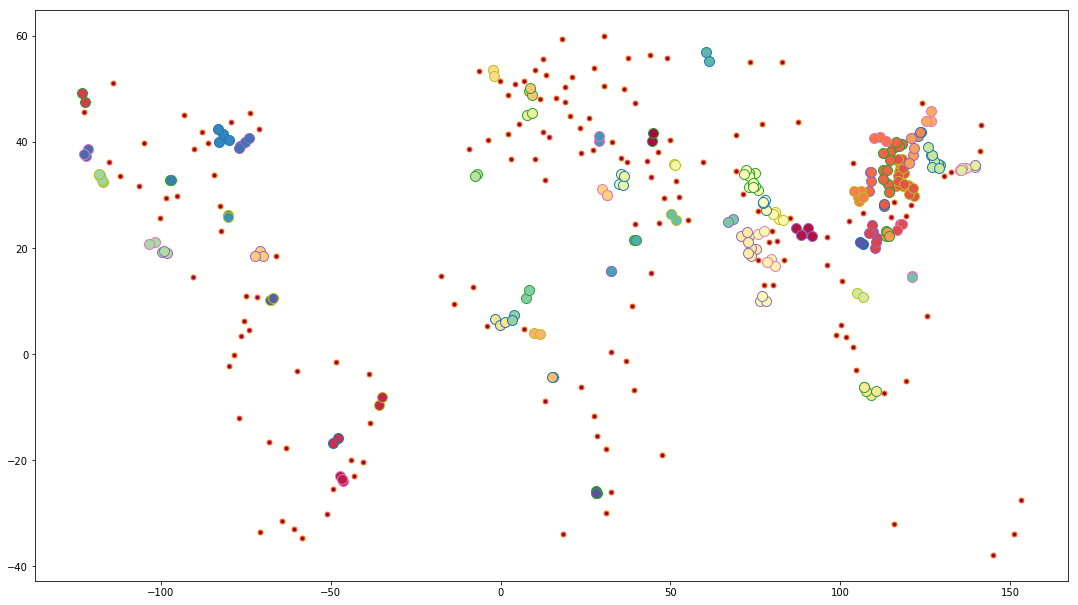

250 km


In [18]:
dbscanner(x, y, 2, 2)
print('250 km')

Silhouette Coefficient: 0.234
Estimated number of clusters: 38
Homogeneity: 0.459
Completeness: 0.995
V-measure: 0.628
[ True False  True  True  True  True  True False False False False  True
 False  True  True  True  True  True False False False  True  True  True
  True  True False False  True False  True False False  True  True  True
  True False False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  Tru

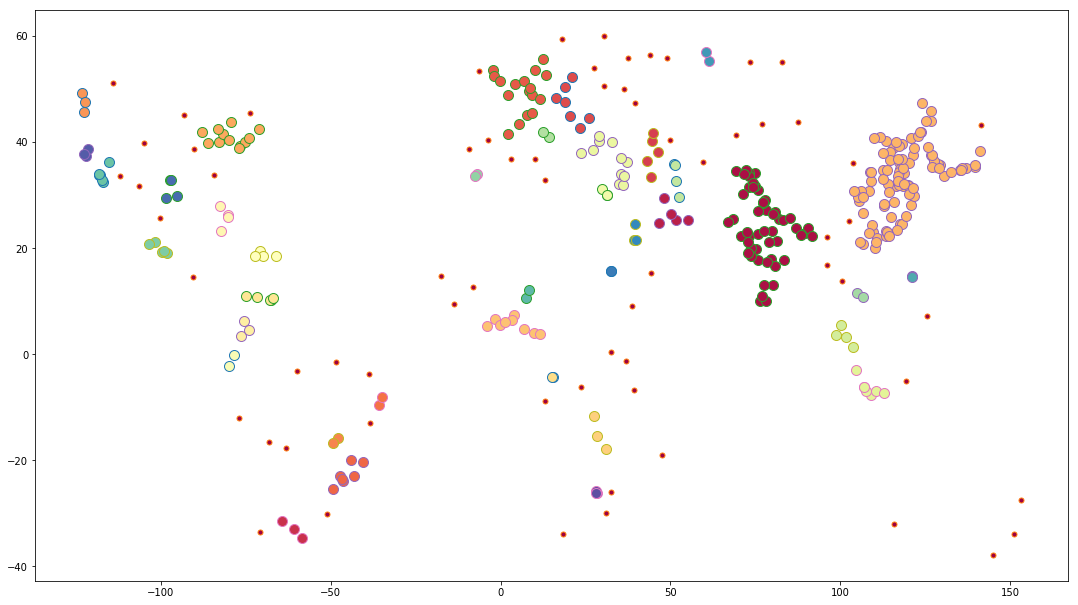

500 km


In [19]:
dbscanner(x, y, 4, 2)
print('500 km')

# Percent of population

In [20]:
df['percent'] = df['pop'] / df['2016']

In [21]:
df.sort_values('percent', ascending = False)

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,percent
"Gibraltar, Gibraltar",GIB,3.440800e+04,Gibraltar,Gibraltar,36.132435,-5.378075,106813.5,Gibraltar,GI,GIB,Gibraltar,3.104322e+00
"Monaco, Monaco",MCO,3.849900e+04,Monaco,Monaco,43.739646,7.406913,36371.0,Monaco,MC,MCO,NaN,9.447258e-01
"Macau, Macau S.A.R",MAC,6.121670e+05,Macau,Macau,22.202997,113.545048,568700.0,Macau S.A.R,MO,MAC,NaN,9.289949e-01
"Willemstad, Curacao",CUW,1.599990e+05,Willemstad,Willemstad,12.200430,-69.019984,146813.0,Curacao,CW,CUW,NaN,9.175870e-01
"San Marino, San Marino",SMR,3.320300e+04,San Marino,San Marino,43.917150,12.466670,29289.5,San Marino,SM,SMR,NaN,8.821341e-01
"Djibouti, Djibouti",DJI,9.423330e+05,Djibouti,Djibouti,11.595014,43.148002,763506.5,Djibouti,DJ,DJI,Djibouti,8.102300e-01
"Hong Kong, Hong Kong S.A.R.",HKG,7.346700e+06,Hong Kong,Hong Kong,22.304981,114.185009,5878789.5,Hong Kong S.A.R.,HK,HKG,NaN,8.001946e-01
"Singapore, Singapore",SGP,5.607283e+06,Singapore,Singapore,1.293033,103.855821,4236614.5,Singapore,SG,SGP,NaN,7.555557e-01
"Vaduz, Liechtenstein",LIE,3.766600e+04,Vaduz,Vaduz,47.133724,9.516669,20811.5,Liechtenstein,LI,LIE,NaN,5.525275e-01
"Koror, Palau",PLW,2.150300e+04,Koror,Koror,7.345226,134.469501,11200.0,Palau,PW,PLW,NaN,5.208576e-01


In [22]:
usa = df[df['iso3'] == 'USA']
usa.sort_values('percent', ascending = False)['percent'].cumsum()

New York, United States of America            0.041854
Los Angeles, United States of America         0.066913
Chicago, United States of America             0.085222
Houston, United States of America             0.097766
Philadelphia, United States of America        0.108612
Dallas, United States of America              0.117911
Miami, United States of America               0.127146
Boston, United States of America              0.134970
Detroit, United States of America             0.142788
Atlanta, United States of America             0.150414
Washington, D.C., United States of America    0.157982
Phoenix, United States of America             0.165521
San Francisco, United States of America       0.171992
San Diego, United States of America           0.177991
Denver, United States of America              0.183967
Seattle, United States of America             0.189604
Irvine, United States of America              0.194591
Pittsburgh, United States of America          0.199342
Minneapoli

# All Cities

In [23]:
X = df[['lng','lat']]
x = df['lng']
y = df['lat']

Silhouette Coefficient: -0.485
Estimated number of clusters: 193
Homogeneity: 0.261
Completeness: 0.984
V-measure: 0.412
[ True  True  True ...,  True  True  True]


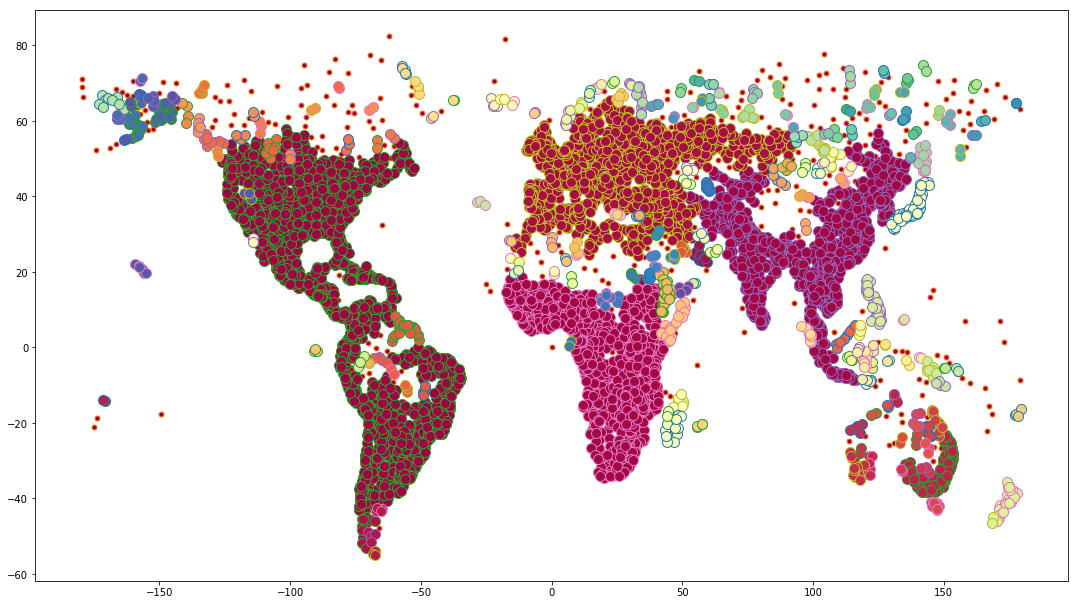

250 km


In [24]:
dbscanner(x, y, 2, 2)
print('250 km')

In [25]:
lgn.scatter(x, y, labels = df['city'])

# 200,000

In [26]:
million = df[df['pop'] > 200000]

In [27]:
X = million[['lng','lat']]
x = million['lng']
y = million['lat']

In [28]:
lgn.scatter(x, y, labels = million['city'])

Silhouette Coefficient: 0.141
Estimated number of clusters: 172
Homogeneity: 0.524
Completeness: 0.988
V-measure: 0.685
[ True  True  True ...,  True  True False]


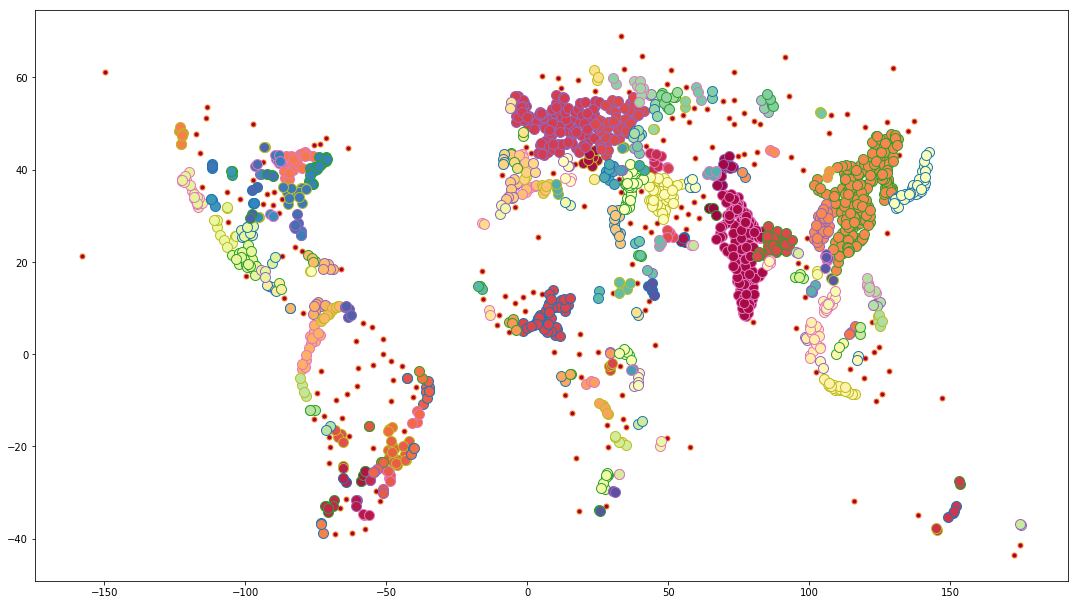

250 km


In [29]:
dbscanner(x, y, 2, 2)
print('250 km')

Silhouette Coefficient: -0.046
Estimated number of clusters: 76
Homogeneity: 0.368
Completeness: 0.986
V-measure: 0.536
[ True  True  True ...,  True  True False]


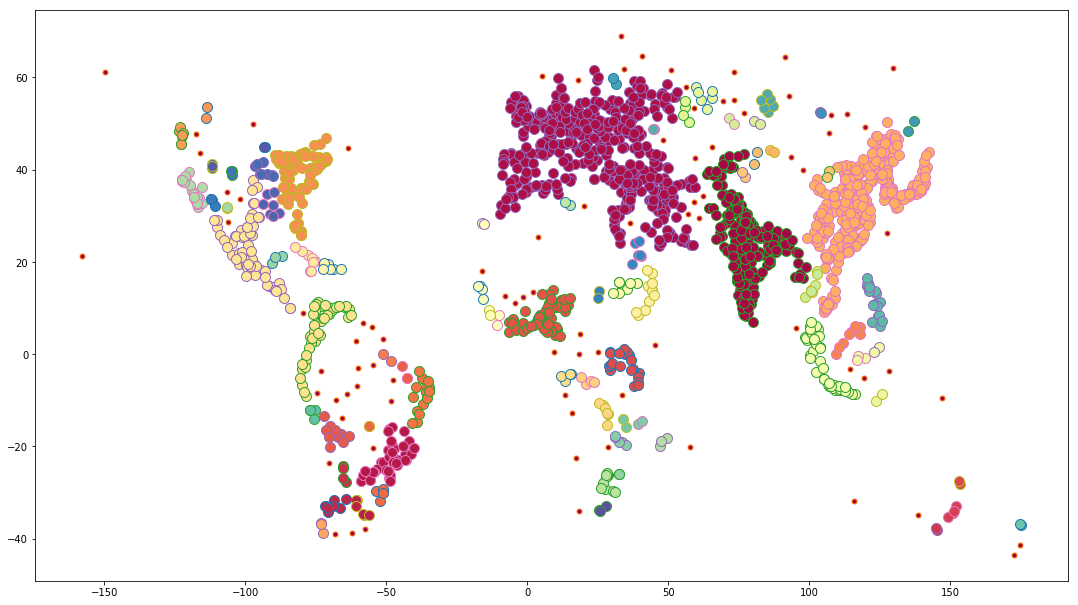

375 km


In [30]:
dbscanner(x, y, 3, 2)
print('375 km')

Silhouette Coefficient: -0.289
Estimated number of clusters: 42
Homogeneity: 0.232
Completeness: 0.989
V-measure: 0.375
[ True  True  True ...,  True  True  True]


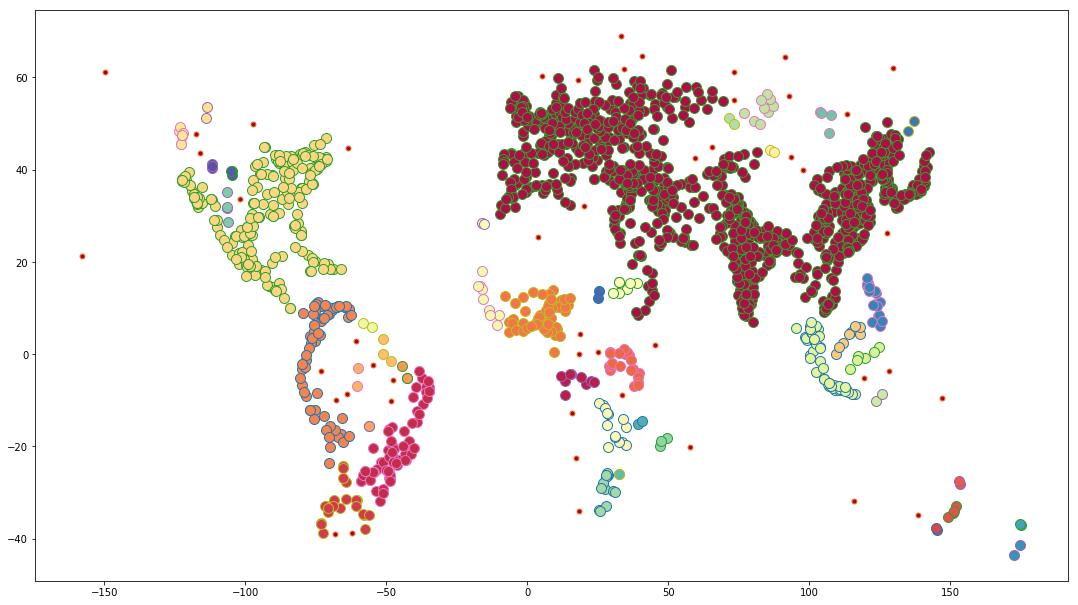

500 km


In [31]:
dbscanner(x, y, 4, 2)
print('500 km')

# Distances

In [32]:
df.head()

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,percent
"Oranjestad, Aruba",ABW,104822.0,Oranjestad,Oranjestad,12.530384,-70.028992,50887.5,Aruba,AW,ABW,NaN,0.485466
"Qal eh-ye Now, Afghanistan",AFG,34656032.0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis,0.000086
"Chaghcharan, Afghanistan",AFG,34656032.0,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor,0.000433
"Lashkar Gah, Afghanistan",AFG,34656032.0,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand,0.005816
"Zaranj, Afghanistan",AFG,34656032.0,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz,0.001438


In [33]:
washington = df[df['province']=='Washington'].sort_values('pop', ascending = False).reset_index()

In [34]:
washington.head()

,index,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,percent
0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,US,USA,Washington,0.005638
1,"Tacoma, United States of America",USA,323127513.0,Tacoma,Tacoma,47.211316,-122.515013,460273.0,United States of America,US,USA,Washington,0.001424
2,"Vancouver, United States of America",USA,323127513.0,Vancouver,Vancouver,45.630301,-122.639993,343796.5,United States of America,US,USA,Washington,0.001064
3,"Everett, United States of America",USA,323127513.0,Everett,Everett,47.960417,-122.199968,291948.0,United States of America,US,USA,Washington,0.000904
4,"Spokane, United States of America",USA,323127513.0,Spokane,Spokane,47.669996,-117.419949,272483.5,United States of America,US,USA,Washington,0.000843


In [35]:
pd.concat([pd.concat([washington[washington.index == 0]]*16).reset_index(), washington], 1)

,level_0,index,Country Code,2016,city,city_ascii,lat,lng,pop,country,...,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,percent
0,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,US,USA,Washington,0.005638
1,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Tacoma,Tacoma,47.211316,-122.515013,460273.0,United States of America,US,USA,Washington,0.001424
2,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Vancouver,Vancouver,45.630301,-122.639993,343796.5,United States of America,US,USA,Washington,0.001064
3,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Everett,Everett,47.960417,-122.199968,291948.0,United States of America,US,USA,Washington,0.000904
4,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Spokane,Spokane,47.669996,-117.419949,272483.5,United States of America,US,USA,Washington,0.000843
5,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Olympia,Olympia,47.038045,-122.899434,100950.0,United States of America,US,USA,Washington,0.000312
6,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Yakima,Yakima,46.602232,-120.504697,93846.0,United States of America,US,USA,Washington,0.000290
7,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Bellingham,Bellingham,48.760136,-122.486927,86565.5,United States of America,US,USA,Washington,0.000268
8,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Kennewick,Kennewick,46.211377,-119.136098,82331.0,United States of America,US,USA,Washington,0.000255
9,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Bremerton,Bremerton,47.573596,-122.642018,82039.5,United States of America,US,USA,Washington,0.000254


In [36]:
washington.shape[0]

16

In [37]:
million = df[df['pop'] > 1000000]
million

,Country Code,2016,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,percent
"Kabul, Afghanistan",AFG,34656032.0,Kabul,Kabul,34.516690,69.183260,3160266.0,Afghanistan,AF,AFG,Kabul,0.091189
"Luanda, Angola",AGO,28813463.0,Luanda,Luanda,-8.838286,13.234427,3562086.0,Angola,AO,AGO,Luanda,0.123626
"Dubai, United Arab Emirates",ARE,9269612.0,Dubai,Dubai,25.229996,55.279974,1258173.5,United Arab Emirates,AE,ARE,Dubay,0.135731
"Rosario, Argentina",ARG,43847430.0,Rosario,Rosario,-32.951130,-60.666308,1094784.5,Argentina,AR,ARG,Santa Fe,0.024968
"Córdoba, Argentina",ARG,43847430.0,Córdoba,Cordoba,-31.399958,-64.182295,1374467.5,Argentina,AR,ARG,Córdoba,0.031347
"Buenos Aires, Argentina",ARG,43847430.0,Buenos Aires,Buenos Aires,-34.602502,-58.397531,11862073.0,Argentina,AR,ARG,Ciudad de Buenos Aires,0.270531
"Yerevan, Armenia",ARM,2924816.0,Yerevan,Yerevan,40.181151,44.513551,1097742.5,Armenia,AM,ARM,Erevan,0.375320
"Brisbane, Australia",AUS,24127159.0,Brisbane,Brisbane,-27.455031,153.035093,1393176.5,Australia,AU,AUS,Queensland,0.057743
"Perth, Australia",AUS,24127159.0,Perth,Perth,-31.955015,115.839999,1206108.0,Australia,AU,AUS,Western Australia,0.049990
"Melbourne, Australia",AUS,24127159.0,Melbourne,Melbourne,-37.820031,144.975016,2131812.5,Australia,AU,AUS,Victoria,0.088357


In [38]:
df2 = pd.concat([pd.concat([washington[washington.index == 0]]*washington.shape[0]).reset_index().add_suffix('_x'), washington], 1)
#for n in range(0, df2.shape[0]):
#    df2 = pd.concat([pd.concat([df2[df2.index == n]]*df2.shape[0]).reset_index(), df2], 1)

In [39]:
df2

,level_0_x,index_x,Country Code_x,2016_x,city_x,city_ascii_x,lat_x,lng_x,pop_x,country_x,...,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,percent
0,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,US,USA,Washington,0.005638
1,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Tacoma,Tacoma,47.211316,-122.515013,460273.0,United States of America,US,USA,Washington,0.001424
2,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Vancouver,Vancouver,45.630301,-122.639993,343796.5,United States of America,US,USA,Washington,0.001064
3,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Everett,Everett,47.960417,-122.199968,291948.0,United States of America,US,USA,Washington,0.000904
4,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Spokane,Spokane,47.669996,-117.419949,272483.5,United States of America,US,USA,Washington,0.000843
5,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Olympia,Olympia,47.038045,-122.899434,100950.0,United States of America,US,USA,Washington,0.000312
6,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Yakima,Yakima,46.602232,-120.504697,93846.0,United States of America,US,USA,Washington,0.000290
7,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Bellingham,Bellingham,48.760136,-122.486927,86565.5,United States of America,US,USA,Washington,0.000268
8,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Kennewick,Kennewick,46.211377,-119.136098,82331.0,United States of America,US,USA,Washington,0.000255
9,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Bremerton,Bremerton,47.573596,-122.642018,82039.5,United States of America,US,USA,Washington,0.000254


In [40]:
for n in list(range(0, washington.shape[0])):
    df3 = pd.concat([pd.concat([washington[washington.index == n]]*washington.shape[0]).reset_index().add_suffix('_x'), washington], 1)
    df2 = pd.concat([df2, df3])

In [41]:
df2

,level_0_x,index_x,Country Code_x,2016_x,city_x,city_ascii_x,lat_x,lng_x,pop_x,country_x,...,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,percent
0,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,US,USA,Washington,0.005638
1,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Tacoma,Tacoma,47.211316,-122.515013,460273.0,United States of America,US,USA,Washington,0.001424
2,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Vancouver,Vancouver,45.630301,-122.639993,343796.5,United States of America,US,USA,Washington,0.001064
3,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Everett,Everett,47.960417,-122.199968,291948.0,United States of America,US,USA,Washington,0.000904
4,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Spokane,Spokane,47.669996,-117.419949,272483.5,United States of America,US,USA,Washington,0.000843
5,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Olympia,Olympia,47.038045,-122.899434,100950.0,United States of America,US,USA,Washington,0.000312
6,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Yakima,Yakima,46.602232,-120.504697,93846.0,United States of America,US,USA,Washington,0.000290
7,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Bellingham,Bellingham,48.760136,-122.486927,86565.5,United States of America,US,USA,Washington,0.000268
8,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Kennewick,Kennewick,46.211377,-119.136098,82331.0,United States of America,US,USA,Washington,0.000255
9,0,"Seattle, United States of America",USA,323127513.0,Seattle,Seattle,47.570002,-122.339985,1821684.5,United States of America,...,Bremerton,Bremerton,47.573596,-122.642018,82039.5,United States of America,US,USA,Washington,0.000254


In [42]:
df2.shape

(272, 27)

In [43]:
df2['index'].value_counts()

Walla Walla, United States of America    17
Seattle, United States of America        17
Olympia, United States of America        17
Yakima, United States of America         17
Tacoma, United States of America         17
Kennewick, United States of America      17
Wenatchee, United States of America      17
Vancouver, United States of America      17
Bellingham, United States of America     17
Aberdeen, United States of America       17
Longview, United States of America       17
Bremerton, United States of America      17
Centralia, United States of America      17
Everett, United States of America        17
Richland, United States of America       17
Spokane, United States of America        17
Name: index, dtype: int64